# Silhouette plot using silhouette_score
### source: https://www.youtube.com/watch?v=Qh7VxLsaU9M&t=224s

# <span style='background :yellow' > Auditory modality </span>

In [45]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import numpy as np
from pylab import rcParams
from matplotlib.ticker import FixedFormatter, FixedLocator
import warnings
warnings.filterwarnings('ignore')

In [111]:
df=pd.read_csv('C:/Users/zhaleh/PhD_Projects/Divergent Paths of Beat Perception_3 Modalities/results/PreprocessedResults_MusicAdded.csv') 
df=df[['AudSD','AudIrreg','AudReg']]
# transform data into numpy array 
X=df.iloc[:141,:].values
X.shape

(141, 3)

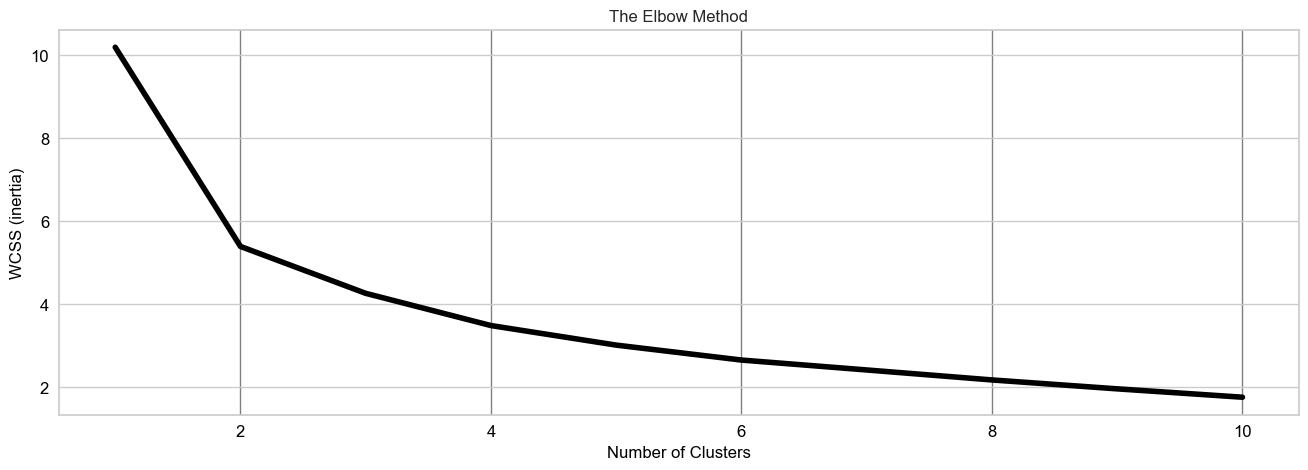

In [112]:
# Let's plot K Vs WCSS

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init = 10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss,linewidth=4, color='black')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters',family='Arial', fontsize=12,color='black')
plt.ylabel('WCSS (inertia)', family='Arial', fontsize=12,color='black')
plt.xticks(fontsize=12,color='black')
plt.yticks(fontsize=12, color='black')
plt.grid(which='both',color='black',axis='x',alpha=0.5)
# plt.axvline(x=number_of_clusters,linewidth=2,color='blue',linestyle='--') # define this after you check the elbow
plt.show()

In [113]:
silhouette_score(X,kmeans.labels_)


0.2661200560833124

In [114]:
kmeans_per_k=[KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1,10)]
silhouette_scores=[silhouette_score(X,model.labels_)
                 for model in kmeans_per_k[1:]]
silhouette_scores

[0.4015168308137683,
 0.29204447082863394,
 0.2667120717977859,
 0.25350574337192056,
 0.25074469506663505,
 0.2509634142292536,
 0.2547882996845944,
 0.2597927161704058]

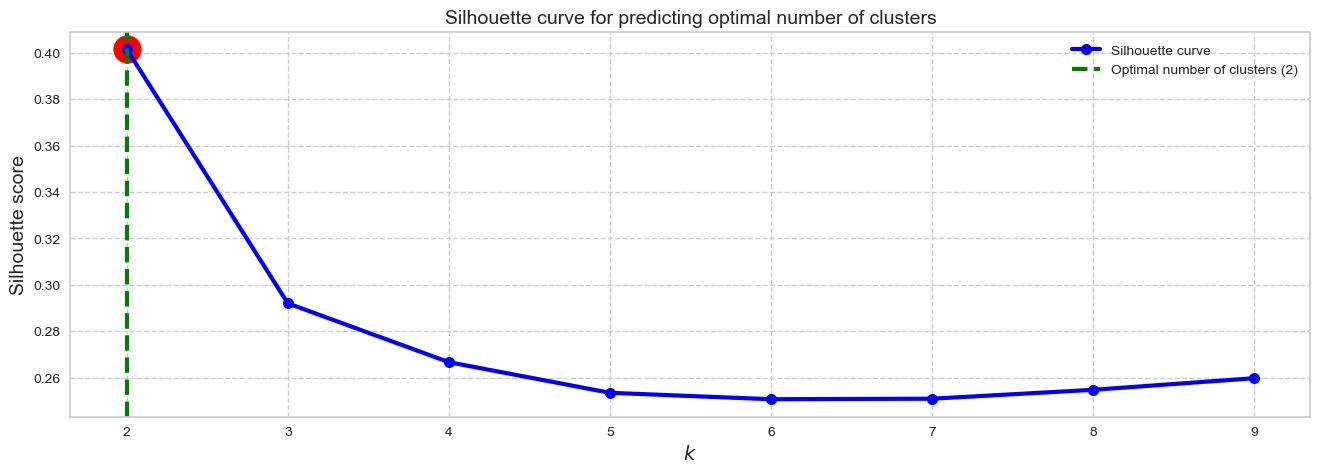

In [115]:
rcParams['figure.figsize']=16,5
plt.plot(range(2,10), silhouette_scores, 'bo-',color='blue',
           linewidth=3, markersize=8, label='Silhouette curve')
plt.xlabel('$k$', fontsize=14, family='Arial')
plt.ylabel('Silhouette score', fontsize=14, family='Arial')
plt.grid(which='major',color='#cccccc', linestyle='--')

plt.title('Silhouette curve for predicting optimal number of clusters', family='Arial',fontsize=14)
#calculate the optimal number of clusters
k=np.argmax(silhouette_scores)+2
plt.axvline(x=k, linestyle='--',c='green', linewidth=3,
           label='Optimal number of clusters ({})'.format(k))
plt.scatter(k,silhouette_scores[k-2], c='red',s=400)
plt.legend(shadow=True)
plt.show()

# Silhouette diagram

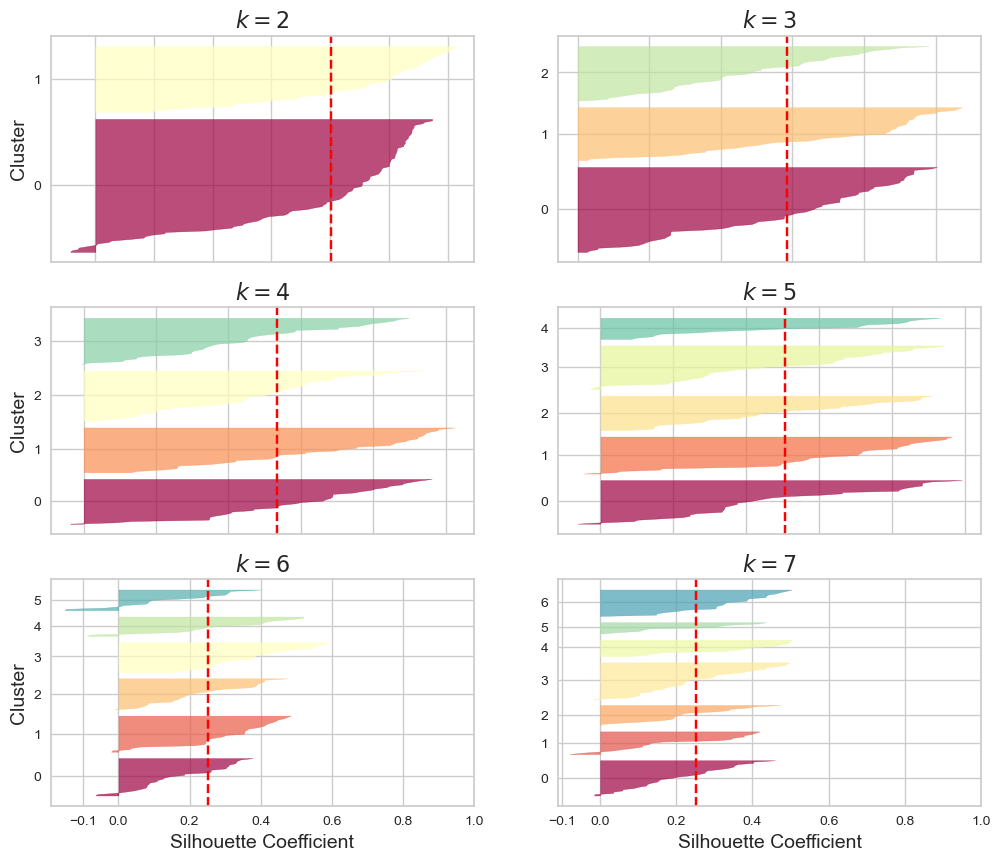

In [116]:
plt.figure(figsize=(12,10))
for k in (2,3,4,5,6,7):
    plt.subplot(3,2,k-1)
    y_pred=kmeans_per_k[k-1].labels_
    silhouette_coefficients=silhouette_samples(X,y_pred)
    padding = len(X)//30
    pos = padding
    ticks=[]
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()
        color = mpl.cm.Spectral(i/k)
        plt.fill_betweenx(np.arange(pos,pos + len(coeffs)), 0, coeffs,
                         facecolor = color, edgecolor = color, alpha = 0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (2,4,6):
        plt.ylabel('Cluster', family='Arial', fontsize=14)
    if k in (6,7):
        plt.gca().set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
        plt.xlabel('Silhouette Coefficient', family = 'Arial', fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    plt.axvline(x=silhouette_scores[k-2], color='red', linestyle='--')
    plt.title('$k={}$'.format(k),fontsize=16)
    
## you can use the following lines to print the plot
plt.savefig("C:/Users/zhaleh/PhD_Projects/Divergent Paths of Beat Perception_3 Modalities/plots/Silhouette_plot_Auditory.png", dpi=300, bbox_inches='tight')
plt.show()

# Silhouette diagram
### source: https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam

In [83]:
df=pd.read_csv('C:/Users/zhaleh/PhD_Projects/Divergent Paths of Beat Perception_3 Modalities/results/PreprocessedResults_MusicAdded.csv')
df=df[['AudSD','AudIrreg','AudReg']]
# transform data into numpy array 
X=df.iloc[:141,:].values
X.shape

(141, 3)

In [84]:
# Instantiate the KMeans models
km = KMeans(n_clusters=5, random_state=42)
# Fit the KMeans model
km.fit_predict(X)
# Calculate Silhoutte Score
score = silhouette_score(X, km.labels_, metric='euclidean')
# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.254


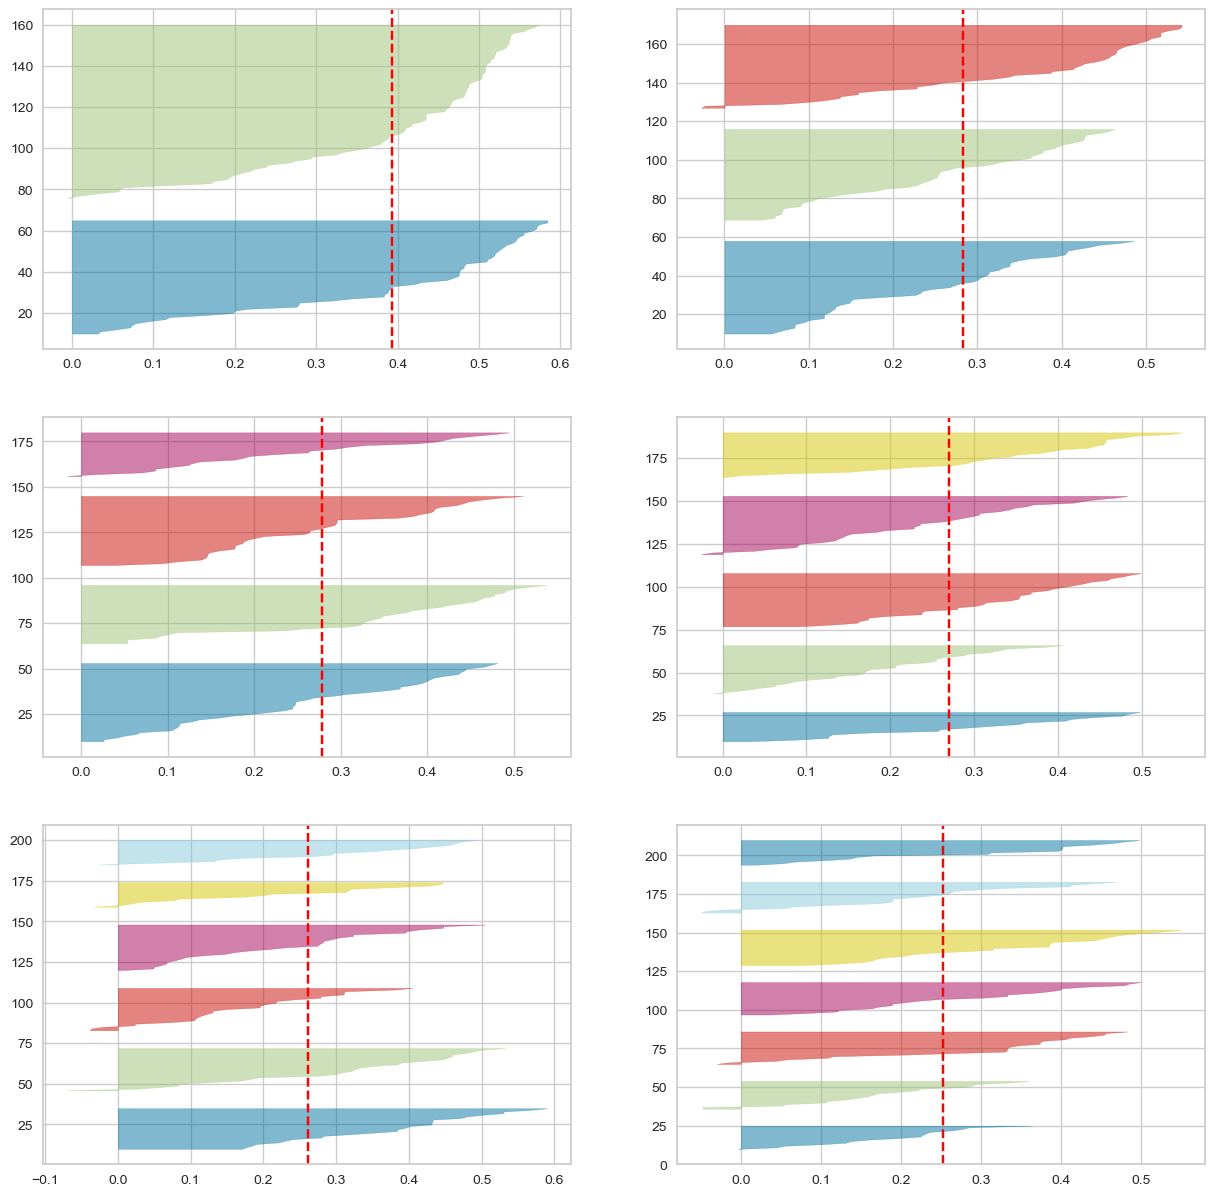

In [85]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 2, figsize=(15,15))
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

Notice that the explanation below is for the first round of in-person data with 49 samples and not for the final one with 141 participants. 

# <span style='background :yellow' > Visual in-person </span>

In [117]:
df=pd.read_csv('C:/Users/zhaleh/PhD_Projects/Divergent Paths of Beat Perception_3 Modalities/results/PreprocessedResults_MusicAdded.csv')
df=df[['VisSD','VisIrreg','VisReg']]
# transform data into numpy array 
X=df.iloc[:141,:].values
X.shape

(141, 3)

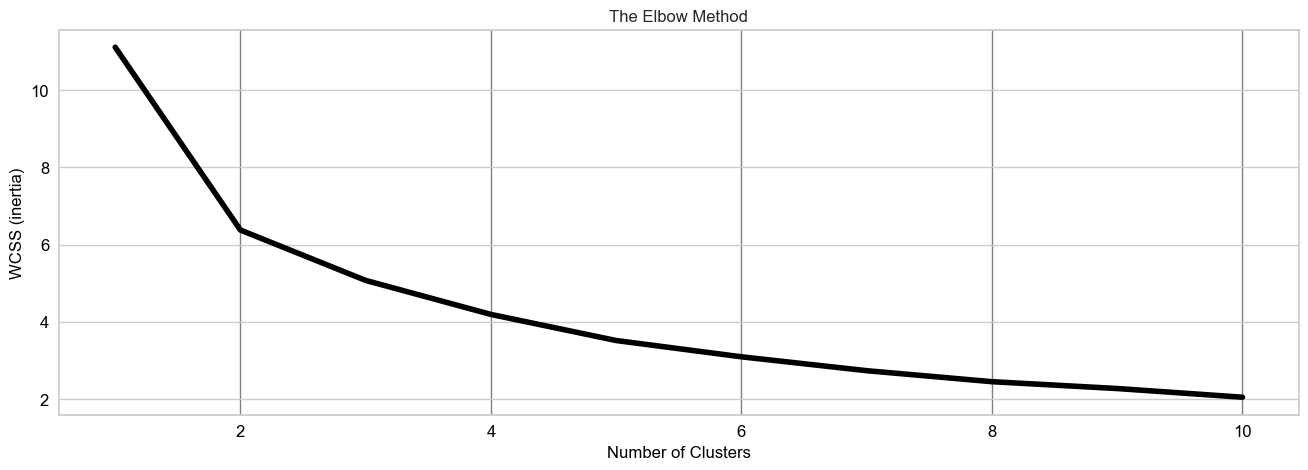

In [118]:
# Let's plot K Vs WCSS

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init = 10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss,linewidth=4, color='black')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters',family='Arial', fontsize=12,color='black')
plt.ylabel('WCSS (inertia)', family='Arial', fontsize=12,color='black')
plt.xticks(fontsize=12,color='black')
plt.yticks(fontsize=12, color='black')
plt.grid(which='both',color='black',axis='x',alpha=0.5)
# plt.axvline(x=number_of_clusters,linewidth=2,color='blue',linestyle='--') # define this after you check the elbow
plt.show()

In [119]:
silhouette_score(X,kmeans.labels_)


0.2856804110127235

In [120]:
kmeans_per_k=[KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1,10)]
silhouette_scores=[silhouette_score(X,model.labels_)
                 for model in kmeans_per_k[1:]]
silhouette_scores

[0.35198146007455233,
 0.27634854758317523,
 0.24206902359131216,
 0.25230260854007097,
 0.28102503541913965,
 0.26357260359606993,
 0.28278188079319416,
 0.2728633915080411]

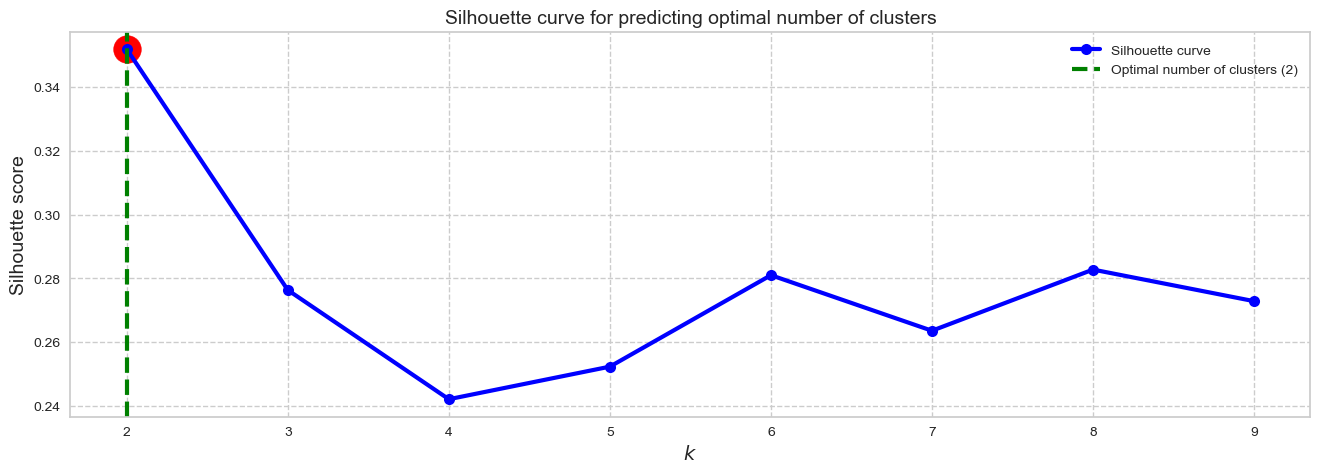

In [121]:
rcParams['figure.figsize']=16,5
plt.plot(range(2,10), silhouette_scores, 'bo-',color='blue',
           linewidth=3, markersize=8, label='Silhouette curve')
plt.xlabel('$k$', fontsize=14, family='Arial')
plt.ylabel('Silhouette score', fontsize=14, family='Arial')
plt.grid(which='major',color='#cccccc', linestyle='--')

plt.title('Silhouette curve for predicting optimal number of clusters', family='Arial',fontsize=14)
#calculate the optimal number of clusters
k=np.argmax(silhouette_scores)+2
plt.axvline(x=k, linestyle='--',c='green', linewidth=3,
           label='Optimal number of clusters ({})'.format(k))
plt.scatter(k,silhouette_scores[k-2], c='red',s=400)
plt.legend(shadow=True)
plt.show()

# Silhouette diagram

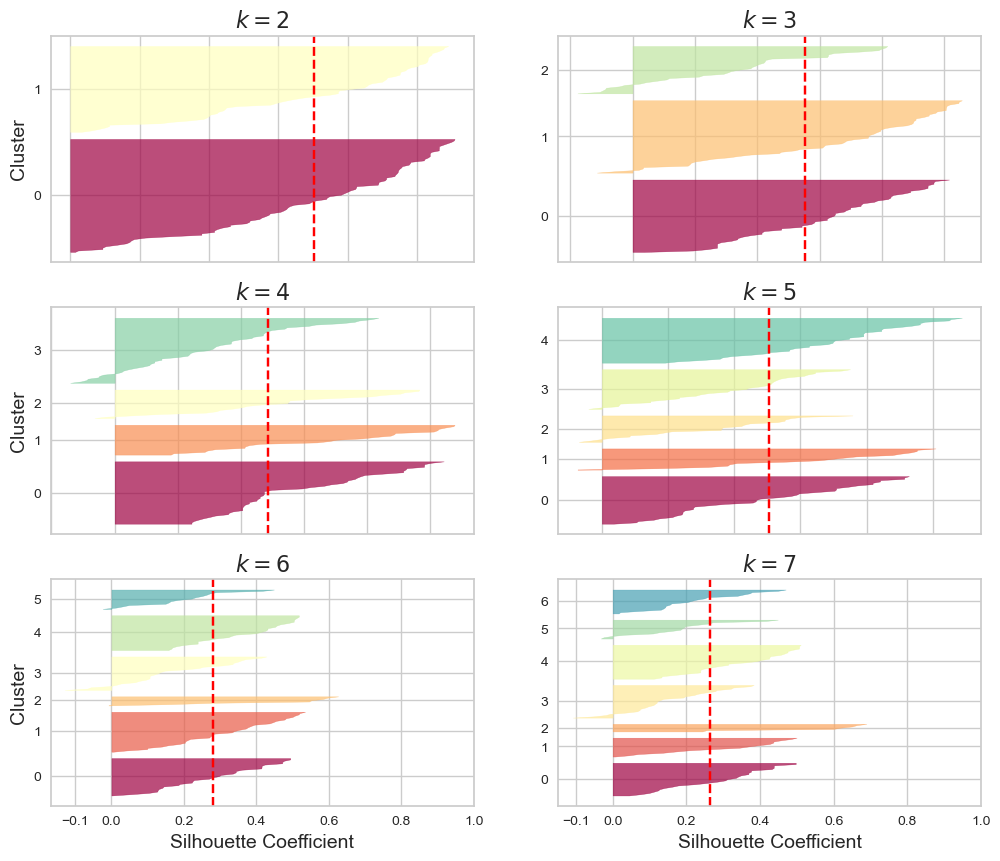

In [122]:
plt.figure(figsize=(12,10))
for k in (2,3,4,5,6,7):
    plt.subplot(3,2,k-1)
    y_pred=kmeans_per_k[k-1].labels_
    silhouette_coefficients=silhouette_samples(X,y_pred)
    padding = len(X)//30
    pos = padding
    ticks=[]
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()
        color = mpl.cm.Spectral(i/k)
        plt.fill_betweenx(np.arange(pos,pos + len(coeffs)), 0, coeffs,
                         facecolor = color, edgecolor = color, alpha = 0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (2,4,6):
        plt.ylabel('Cluster', family='Arial', fontsize=14)
    if k in (6,7):
        plt.gca().set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
        plt.xlabel('Silhouette Coefficient', family = 'Arial', fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    plt.axvline(x=silhouette_scores[k-2], color='red', linestyle='--')
    plt.title('$k={}$'.format(k),fontsize=16)

plt.savefig("C:/Users/zhaleh/PhD_Projects/Divergent Paths of Beat Perception_3 Modalities/plots/Silhouette_plot_Visual.png", dpi=300, bbox_inches='tight')
plt.show()

In [92]:
df=pd.read_csv('C:/Users/zhaleh/PhD_Projects/Divergent Paths of Beat Perception_3 Modalities/results/PreprocessedResults_MusicAdded.csv')
df=df[['VisSD','VisIrreg','VisReg']]
# transform data into numpy array 
X=df.iloc[:141,:].values
X.shape

(141, 3)

In [93]:
# Instantiate the KMeans models
km = KMeans(n_clusters=5, random_state=42)
# Fit the KMeans model
km.fit_predict(X)
# Calculate Silhoutte Score
score = silhouette_score(X, km.labels_, metric='euclidean')
# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.252


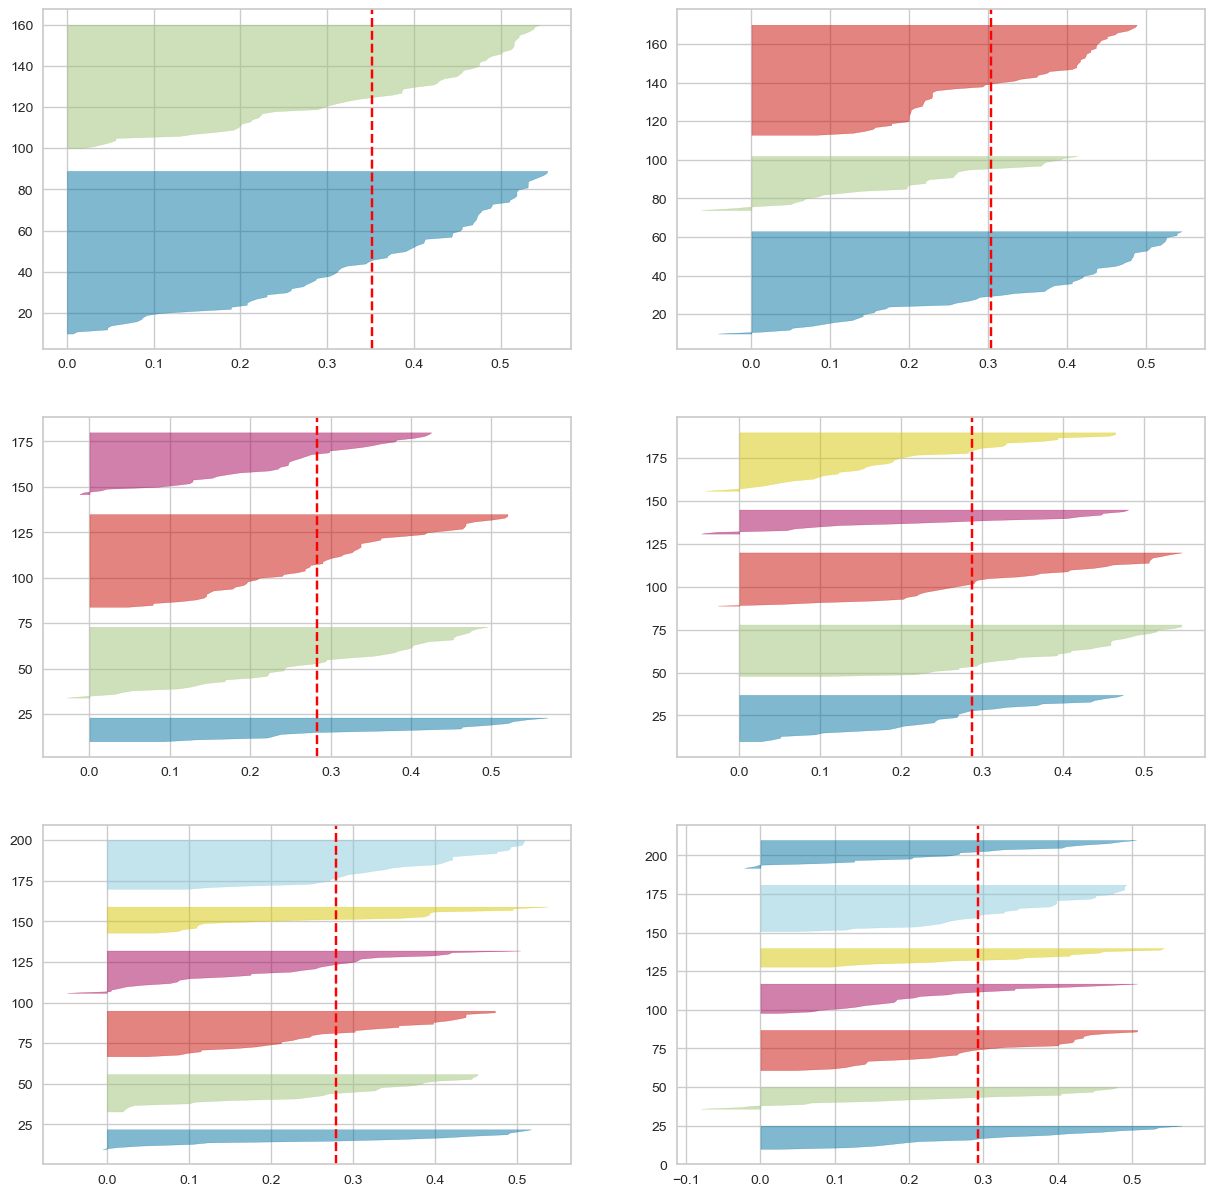

In [94]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 2, figsize=(15,15))
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

# <span style='background :yellow' > Tactile in-person </span>

In [123]:
df=pd.read_csv('C:/Users/zhaleh/PhD_Projects/Divergent Paths of Beat Perception_3 Modalities/results/PreprocessedResults_MusicAdded.csv')
df=df[['TactSD','TactIrreg','TactReg']]
# transform data into numpy array 
X=df.iloc[:141,:].values
X.shape

(141, 3)

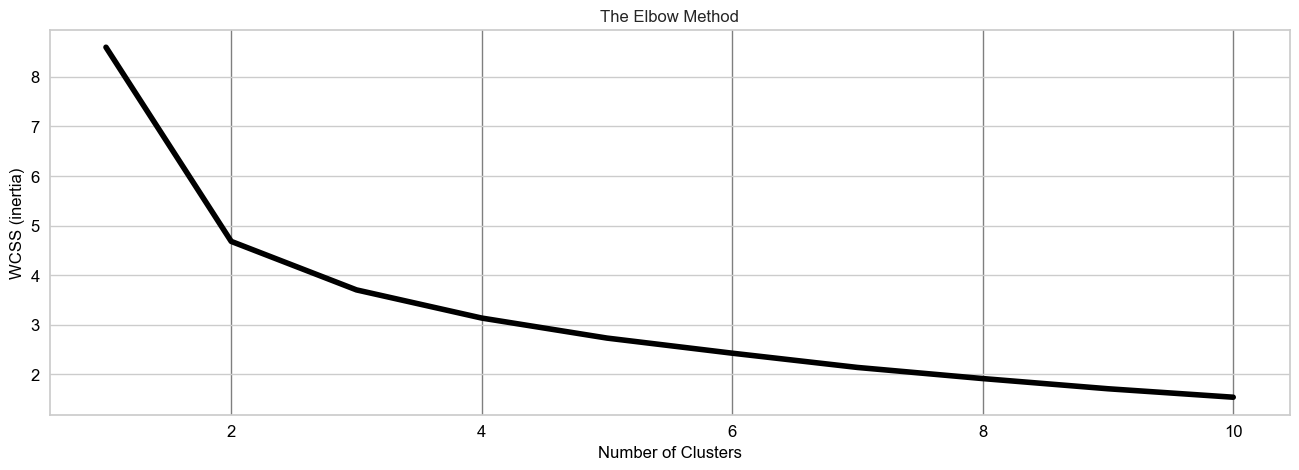

In [124]:
# Let's plot K Vs WCSS

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init = 10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss,linewidth=4, color='black')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters',family='Arial', fontsize=12,color='black')
plt.ylabel('WCSS (inertia)', family='Arial', fontsize=12,color='black')
plt.xticks(fontsize=12,color='black')
plt.yticks(fontsize=12, color='black')
plt.grid(which='both',color='black',axis='x',alpha=0.5)
# plt.axvline(x=number_of_clusters,linewidth=2,color='blue',linestyle='--') # define this after you check the elbow
plt.show()

In [125]:
silhouette_score(X,kmeans.labels_)


0.2703592561195468

In [126]:
kmeans_per_k=[KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1,10)]
silhouette_scores=[silhouette_score(X,model.labels_)
                 for model in kmeans_per_k[1:]]
silhouette_scores

[0.41708931590282394,
 0.28793792453979306,
 0.2691924015105041,
 0.2508380289873648,
 0.2239830066304147,
 0.2625924429005905,
 0.23364800335080382,
 0.24505447161122926]

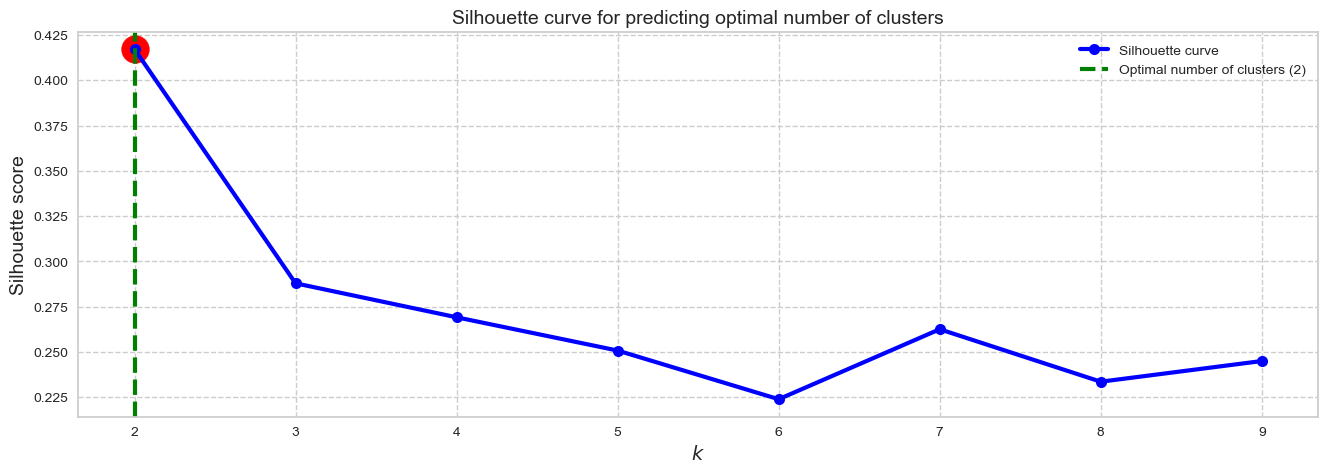

In [127]:
rcParams['figure.figsize']=16,5
plt.plot(range(2,10), silhouette_scores, 'bo-',color='blue',
           linewidth=3, markersize=8, label='Silhouette curve')
plt.xlabel('$k$', fontsize=14, family='Arial')
plt.ylabel('Silhouette score', fontsize=14, family='Arial')
plt.grid(which='major',color='#cccccc', linestyle='--')

plt.title('Silhouette curve for predicting optimal number of clusters', family='Arial',fontsize=14)
#calculate the optimal number of clusters
k=np.argmax(silhouette_scores)+2
plt.axvline(x=k, linestyle='--',c='green', linewidth=3,
           label='Optimal number of clusters ({})'.format(k))
plt.scatter(k,silhouette_scores[k-2], c='red',s=400)
plt.legend(shadow=True)
plt.show()

# Silhouette diagram

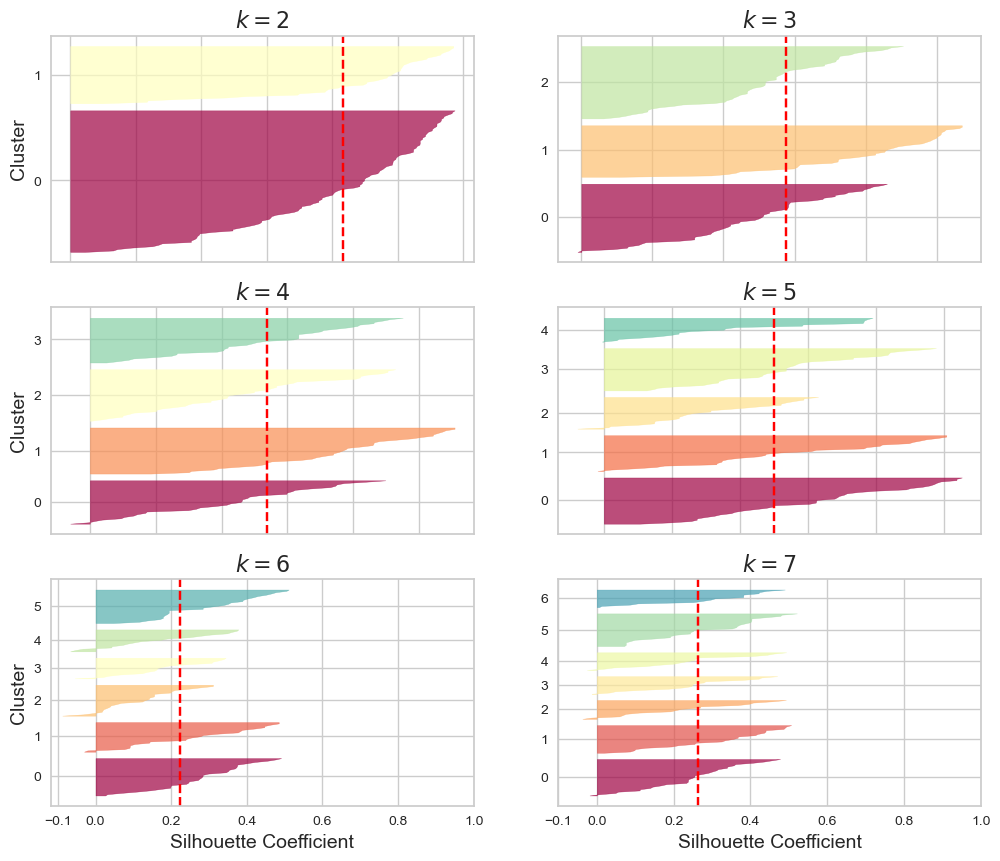

In [128]:
plt.figure(figsize=(12,10))
for k in (2,3,4,5,6,7):
    plt.subplot(3,2,k-1)
    y_pred=kmeans_per_k[k-1].labels_
    silhouette_coefficients=silhouette_samples(X,y_pred)
    padding = len(X)//30
    pos = padding
    ticks=[]
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()
        color = mpl.cm.Spectral(i/k)
        plt.fill_betweenx(np.arange(pos,pos + len(coeffs)), 0, coeffs,
                         facecolor = color, edgecolor = color, alpha = 0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (2,4,6):
        plt.ylabel('Cluster', family='Arial', fontsize=14)
    if k in (6,7):
        plt.gca().set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
        plt.xlabel('Silhouette Coefficient', family = 'Arial', fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    plt.axvline(x=silhouette_scores[k-2], color='red', linestyle='--')
    plt.title('$k={}$'.format(k),fontsize=16)

plt.savefig("C:/Users/zhaleh/PhD_Projects/Divergent Paths of Beat Perception_3 Modalities/plots/Silhouette_plot_Tactile.png", dpi=300, bbox_inches='tight')
plt.show()

In [101]:
df=pd.read_csv('C:/Users/zhaleh/PhD_Projects/Divergent Paths of Beat Perception_3 Modalities/results/PreprocessedResults_MusicAdded.csv')
df=df[['TactSD','TactIrreg','TactReg']]
# transform data into numpy array 
X=df.iloc[:141,:].values
X.shape

(141, 3)

In [102]:
# Instantiate the KMeans models
km = KMeans(n_clusters=5, random_state=42)
# Fit the KMeans model
km.fit_predict(X)
# Calculate Silhoutte Score
score = silhouette_score(X, km.labels_, metric='euclidean')
# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.251


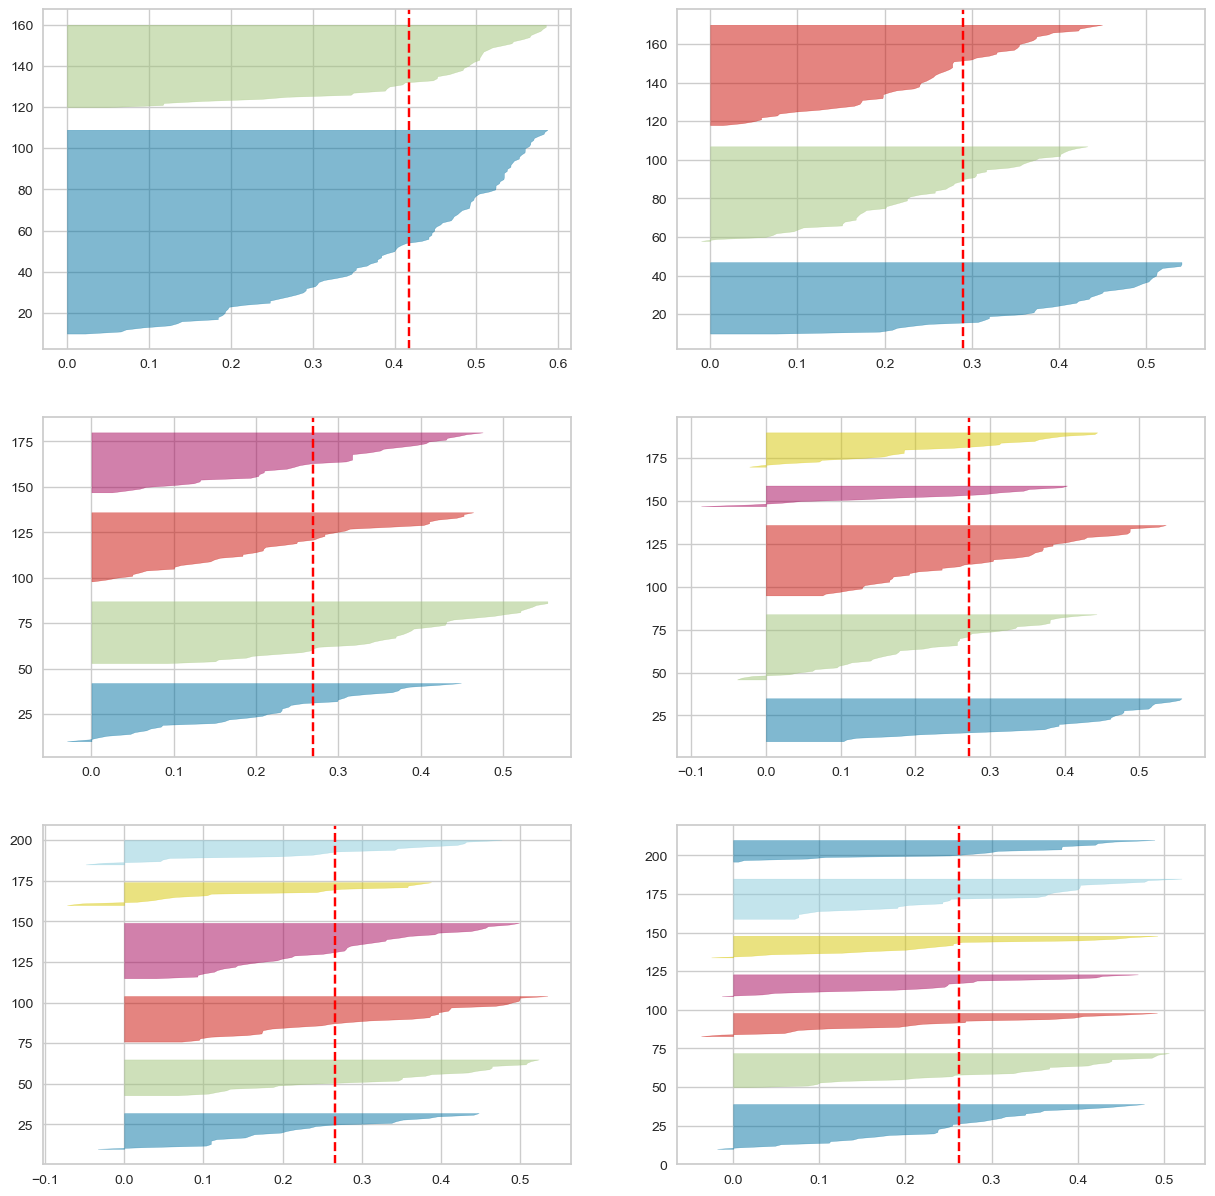

In [103]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 2, figsize=(15,15))
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)